In [1]:
from ScalableVolumetricBenchmark import *

#braket for tests
from braket.circuits import Circuit, noises, Gate
from braket.devices import LocalSimulator
from braket.circuits.measure import Measure
from braket.aws import AwsDevice,  AwsSession, AwsQuantumTask
import boto3

# import python modules for visualization
import matplotlib.pyplot as plt
import numpy as np
from rustworkx.visualization import mpl_draw

 # Free-fermion Volume Benchmark with Braket

In [2]:
n_qubits = 3
sample_size = 5
shots = 1024

benchmark = FreeFermionVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm3",
    target_sdk="braket",
    shots=shots,
    auto_save=False,
)
benchmark.create_benchmark()
benchmark

FreeFermionVolumeBenchmark(
  benchmark_id='free_fermion_nq3_s5_20260126T104122_1ca8c064',
  number_of_qubits=3,
  sample_size=5,
  format='qasm3',
  target_sdk='braket',
  workdir=WindowsPath('.benchmarks'),
)

In [3]:
benchmark_circuits = benchmark.get_all_circuits()


braket_benchmark_circuits = [Circuit.from_ir(circuit) for circuit in benchmark_circuits] #load qasm code to braket


print(benchmark_circuits[0], "\n")
print(braket_benchmark_circuits[0], "\n \n \n ")

OPENQASM 3.0;


qubit[3] q;
bit[3] c;

h q[1];
rz(-1.631418) q[0];
rz(2.014706) q[1];
h q[0];
h q[1];
cnot q[0], q[1];
rz(1.283621) q[1];
cnot q[0], q[1];
h q[0];
h q[1];
rz(2.503758) q[0];
rz(-0.906063) q[2];
h q[1];
h q[2];
cnot q[1], q[2];
rz(1.277216) q[2];
cnot q[1], q[2];
h q[1];
h q[2];
rz(1.451802) q[1];
h q[0];
h q[1];
cnot q[0], q[1];
rz(1.846503) q[1];
cnot q[0], q[1];
h q[0];
h q[1];
rz(2.099129) q[0];
rz(1.672073) q[2];
h q[1];
h q[2];
cnot q[1], q[2];
rz(1.905188) q[2];
cnot q[1], q[2];
h q[1];
h q[2];
rz(1.427421) q[1];
h q[0];
h q[1];
cnot q[0], q[1];
rz(-0.949882) q[1];
cnot q[0], q[1];
h q[0];
h q[1];
rz(0.477304) q[2];
h q[1];
h q[2];
cnot q[1], q[2];
rz(0.412830) q[2];
cnot q[1], q[2];
h q[1];
h q[2];
si q[2];
h q[2];

c[0] = measure q[0];
c[1] = measure q[1];
c[2] = measure q[2]; 

T  : │      0      │     1      │  2  │  3  │     4      │  5  │  6  │     7      │  8  │     9      │ 10  │ 11  │     12     │ 13  │ 14  │     15     │ 16  │ 17  │     18     │ 19  │   

## Running and Evaluating the Circuits

Once circuits are prepared, we simulate them on a virtual (ideal) backend and retrieve measurement counts.

In [4]:
device = LocalSimulator("braket_dm")
task = device.run_batch(braket_benchmark_circuits, shots=benchmark.shots)
results = task.results()

counts = [result.measurement_counts for result in results]

Add experimental results to the benchmark instance and evaulate the becnhmark.

In [5]:
benchmark.add_experimental_results(counts)

In [6]:
_ = benchmark.evaluate_benchmark()


 Free-Fermion Benchmark Evaluation (3 qubits)

Parallel projected values (should be near 1):
  • average: 1.020362 ± 0.027031
  • lowest measured value: 0.980251

Orthogonal projected values (should be near 0):
  • average: -0.004387 ± 0.015114
  • highest absolute value: 0.024357


Benchmark passed: True



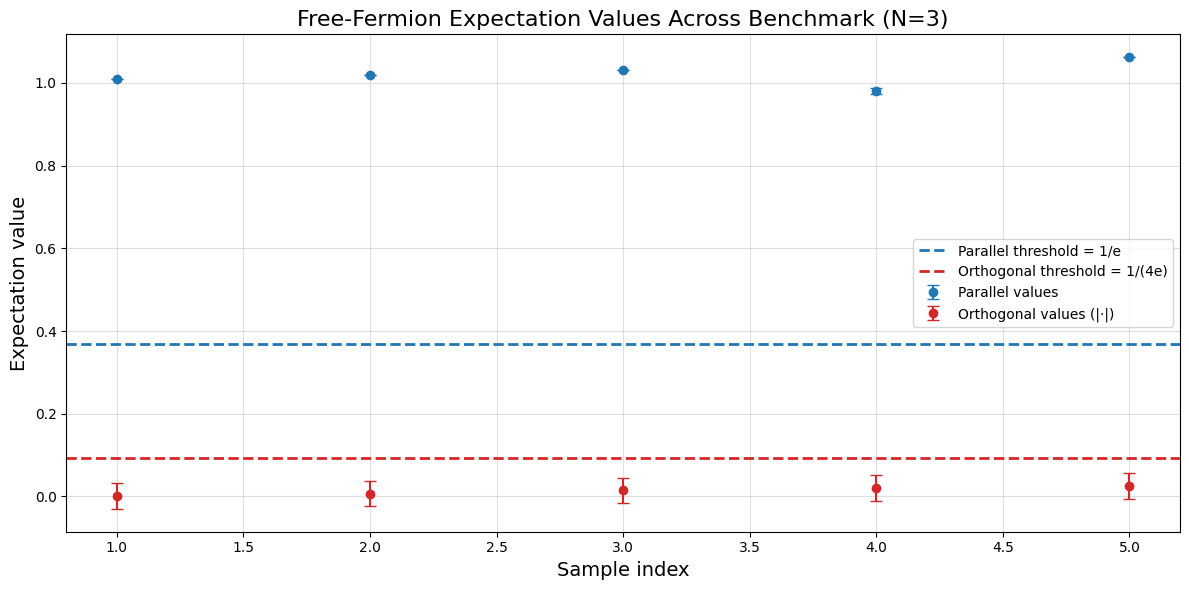

In [7]:
benchmark.plot_all_expectation_values()